In [41]:
import pandas as pd
import requests
import time
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Leer el archivo de Spotify (ajusta el path si es necesario)
df_spotify = pd.read_csv("../Data/artist.csv")

artistas_raw = df_spotify['artist'].dropna().unique()
artistas = set()

# Función para separar artistas con múltiples delimitadores
def split_artists(texto):
    # Reemplazar "Featuring" por un delimitador temporal (e.g., ";") y limpiar
    texto = re.sub(r'\s*Featuring\s*', ',', texto, flags=re.IGNORECASE)
    # Separar por ";" y "&"
    partes = re.split(r'[;&]', texto)
    # Limpiar cada artista y devolver lista
    return [artista.strip() for artista in partes if artista.strip()]

# Procesar cada grupo de artistas
for grupo in artistas_raw:
    for artista in split_artists(grupo):
        artistas.add(artista)

print(f" Total de artistas únicos: {len(artistas)}")


 Total de artistas únicos: 2691


In [9]:
# Consultar MusicBrainz para cada artista
headers = {'User-Agent': 'ETLWorkshop/1.0 (tucorreo@dominio.com)'}
datos_artistas = []

for artist in list(artistas):
    query = artist.replace(" ", "+")
    url = f"https://musicbrainz.org/ws/2/artist/?query=artist:{query}&fmt=json&limit=1"
    
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        data = response.json()
        if data['artists']:
            a = data['artists'][0]
            datos_artistas.append({
                'artist_name': artist,
                'artist_id': a.get('id'),
                'country': a.get('country'),
                'begin_date': a.get('life-span', {}).get('begin'),
                'end_date': a.get('life-span', {}).get('end'),
                'type': a.get('type'),
                'gender': a.get('gender'),
                'disambiguation': a.get('disambiguation')
            })
    else:
        print(f" Error con {artist}: {response.status_code}")
    
    time.sleep(1)

# Guardar como CSV
df_api = pd.DataFrame(datos_artistas)
df_api.to_csv("../Data/api_data.csv")

print("✅ Datos de MusicBrainz guardados en api_data.csv.")

✅ Datos de MusicBrainz guardados en api_data.csv.


In [ ]:
df_api['begin_date'] = pd.to_datetime(df_api['begin_date'], errors='coerce')
df_api['end_date'] = pd.to_datetime(df_api['end_date'], errors='coerce')

In [25]:
df_api.head(10)

,artist_name,artist_id,country,begin_date,end_date,type,gender,disambiguation
0,"William Orbit, songwriters (Madonna)",79239441-bfd5-4981-a70c-55c3f15c1287,US,1958-08-16,NaT,Person,female,“Queen of Pop”
1,Steve Barnett,55111838-f001-494a-a1b5-9d818db85810,AU,1987-11-03,NaT,Person,female,None
2,"Damian ""Jr. Gong"" Marley",cbfb9bcd-c5a0-4d7c-865f-2c641c171e1c,JM,1978-07-21,NaT,Person,male,None
3,Jonny Lang,6a60adeb-c68a-4efd-b16f-04da75a866a5,US,1981-01-29,NaT,Person,male,"American blues, gospel, and rock singer, songw..."
4,Otis Redding,82b1f5fd-cd31-41a9-b5d4-7e33f0eb9751,US,1941-09-09,1967-12-10,Person,male,None
5,Julian Bream,5bada1be-28e1-45b8-9d89-6e14700d82d9,GB,1933-07-15,2020-08-14,Person,male,British classical guitarist and lutenist
6,Motörhead,57961a97-3796-4bf7-9f02-a985a8979ae9,GB,NaT,2015-12-28,Group,None,None
7,Symphony Of The Air Orchestra,de0a29df-428e-4b36-9ed4-14afbf53b8f4,US,NaT,NaT,Orchestra,None,None
8,Rundfunkchor Berlin,d0cbe60f-f919-4873-8c64-537fd600a4f5,DE,NaT,NaT,Choir,None,None
9,The Neptunes,ee5a10e1-b9aa-4c79-8a16-9de2f68bb586,None,NaT,NaT,None,None,"US? hip-hop, feat. on ""P.L.A.M.F"" by Ralo tha ..."


In [26]:
df_api.dtypes

artist_name               object
artist_id                 object
country                   object
begin_date        datetime64[ns]
end_date          datetime64[ns]
type                      object
gender                    object
disambiguation            object
dtype: object

In [30]:
df_api.isnull().sum()

artist_name          0
artist_id            0
country            304
begin_date        1013
end_date          2055
type                25
gender             901
disambiguation    1620
dtype: int64

In [32]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2689 entries, 0 to 2688
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   artist_name     2689 non-null   object        
 1   artist_id       2689 non-null   object        
 2   country         2385 non-null   object        
 3   begin_date      1676 non-null   datetime64[ns]
 4   end_date        634 non-null    datetime64[ns]
 5   type            2664 non-null   object        
 6   gender          1788 non-null   object        
 7   disambiguation  1069 non-null   object        
dtypes: datetime64[ns](2), object(6)
memory usage: 168.2+ KB


In [34]:
df_api.shape

(2689, 8)

In [35]:
df_api.columns

Index(['artist_name', 'artist_id', 'country', 'begin_date', 'end_date', 'type',
       'gender', 'disambiguation'],
      dtype='object')

In [22]:
df_api['country'].unique()

array(['US', 'AU', 'JM', 'GB', 'DE', None, 'AR', 'FR', 'IT', 'MX', 'ES',
       'EE', 'XW', 'JP', 'SE', 'AT', 'CA', 'VE', 'NZ', 'BR', 'PA', 'CU',
       'IE', 'PR', 'ML', 'BE', 'BG', 'IS', 'LV', 'NL', 'PL', 'FI', 'CZ',
       'DK', 'SK', 'CH', 'DO', 'NO', 'LT', 'XE', 'ZA', 'CO', 'CN', 'ID',
       'HU', 'CL', 'NG', 'SG', 'RO', 'RU', 'SU', 'CI', 'BJ', 'IN', 'SN',
       'GT', 'NI', 'BS', 'IL', 'XG', 'MD', 'CV'], dtype=object)

In [36]:
df_api['country'] = df_api['country'].fillna("uknown")

In [37]:
df_api["country"].value_counts().head(10)

country
US        1630
uknown     304
GB         260
CA          62
DE          49
FR          39
JM          30
IT          25
AU          23
CU          16
Name: count, dtype: int64

In [19]:
df_api['gender'].unique()

array(['female', 'male', None, 'not applicable', 'non-binary'],
      dtype=object)

In [20]:
df_api["type"].unique()

array(['Person', 'Group', 'Orchestra', 'Choir', None, 'Other',
       'Character'], dtype=object)

In [39]:
df_api.nunique()

artist_name       2689
artist_id         2228
country             62
begin_date        1337
end_date           494
type                 6
gender               4
disambiguation     657
dtype: int64

In [40]:
df_api["begin_date"].value_counts().head(10)

begin_date
1932-02-08    9
1926-05-26    7
1904-03-01    7
1955-10-07    7
1919-03-17    7
1949-09-23    6
1931-09-12    6
1942-06-18    5
1981-01-31    5
1933-05-03    5
Name: count, dtype: int64

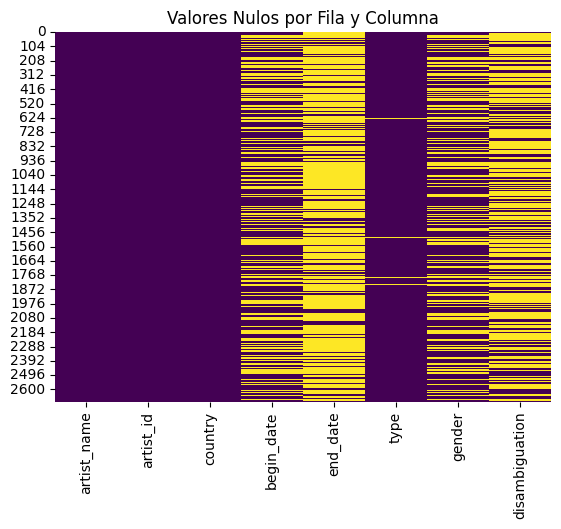

In [44]:
sns.heatmap(df_api.isnull(), cbar=False, cmap='viridis')
plt.title("Valores Nulos por Fila y Columna")
plt.show()

In [46]:
df_api.isnull().sum()


artist_name          0
artist_id            0
country              0
begin_date        1013
end_date          2055
type                25
gender             901
disambiguation    1620
dtype: int64

In [47]:
df_api = df_api.dropna(subset=['artist_name'])

In [48]:
df_api['gender'] = df_api['gender'].fillna('unspecified')

In [61]:
df_api['type'] = df_api['type'].fillna('Other')

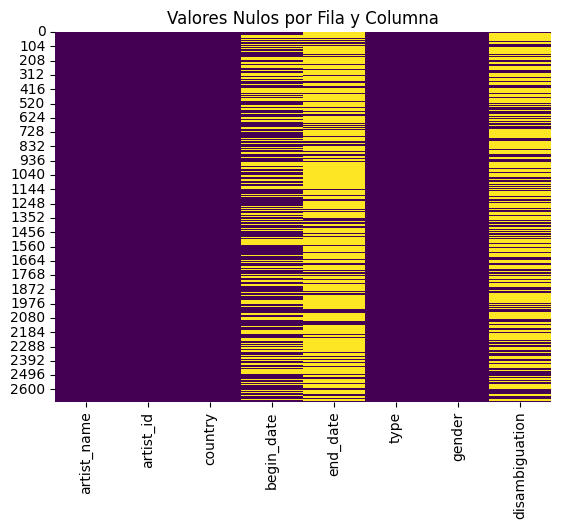

In [50]:
sns.heatmap(df_api.isnull(), cbar=False, cmap='viridis')
plt.title("Valores Nulos por Fila y Columna")
plt.show()

In [ ]:
df_api.drop(columns=['begin_date', 'end_date','disambiguation'], inplace=True)

In [55]:
df_api.columns.tolist()

['artist_name', 'artist_id', 'country', 'type', 'gender']

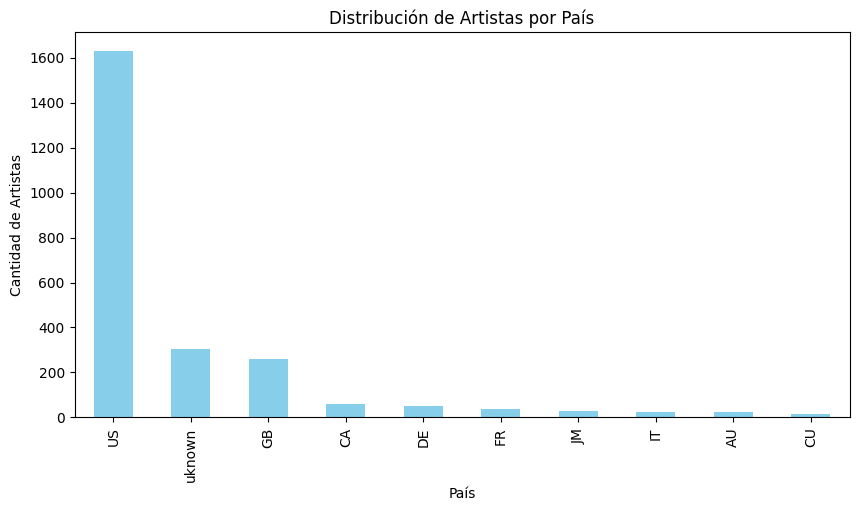

In [ ]:
country_counts = df_api['country'].value_counts()

plt.figure(figsize=(10, 5))
country_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Distribución de Artistas por País')
plt.xlabel('País')
plt.ylabel('Cantidad de Artistas')
plt.show()


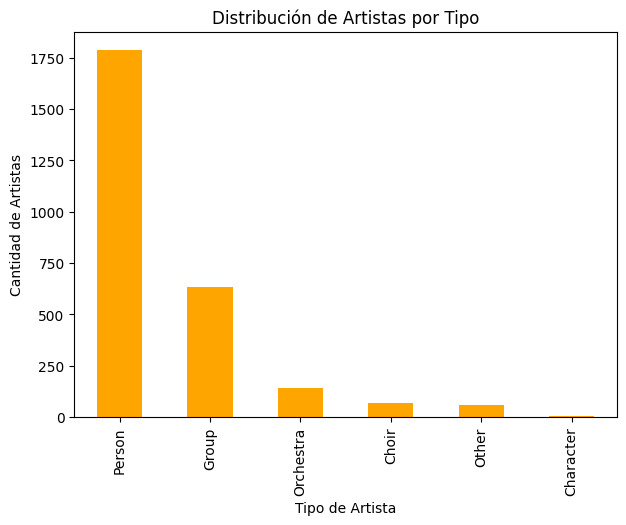

In [64]:
type_counts = df_api['type'].value_counts()

plt.figure(figsize=(7, 5))
type_counts.plot(kind='bar', color='orange')
plt.title('Distribución de Artistas por Tipo')
plt.xlabel('Tipo de Artista')
plt.ylabel('Cantidad de Artistas')
plt.show()

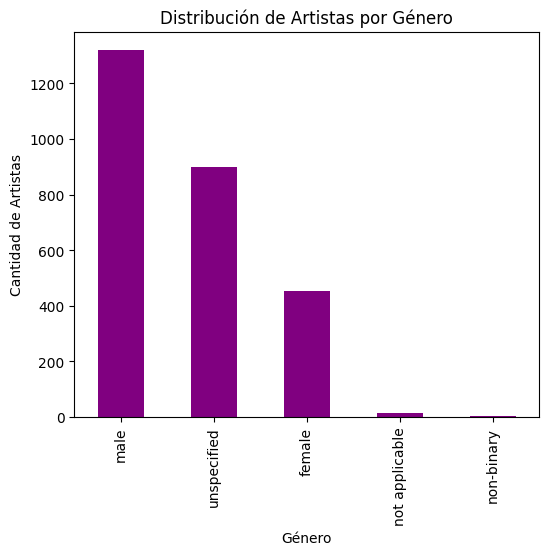

In [65]:
gender_counts = df_api['gender'].value_counts()

plt.figure(figsize=(6, 5))
gender_counts.plot(kind='bar', color='purple')
plt.title('Distribución de Artistas por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad de Artistas')
plt.show()

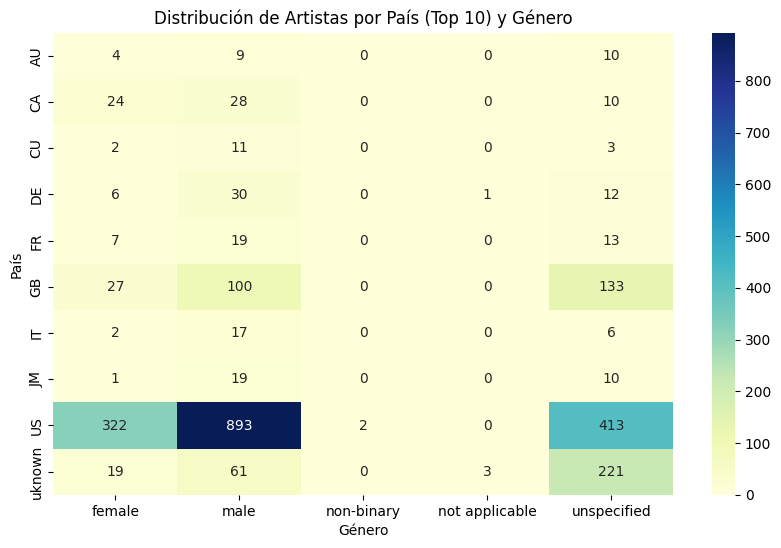

In [74]:
# Seleccionar los 10 países con mayor número de artistas
top10_countries = df_api['country'].value_counts().head(10).index
df_top_countries = df_api[df_api['country'].isin(top10_countries)]

# Crear una tabla cruzada de país y género
country_gender_ct = pd.crosstab(df_top_countries['country'], df_top_countries['gender'])

plt.figure(figsize=(10,6))
sns.heatmap(country_gender_ct, annot=True, cmap='YlGnBu', fmt="d")
plt.title('Distribución de Artistas por País (Top 10) y Género')
plt.xlabel('Género')
plt.ylabel('País')
plt.show()